# News Mood
----

### Analysis
* Depending on news for recent days will change the sentiment analysis greatly.
* Overall, generally BBC news tends to have a lot more negative sentiment compared to other news networks.
* NY Times most times has a positive compound sentiment compared to the other news networks.

In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
from matplotlib import style


# Output File (CSV)
output_data_file = "NewsMoodResults.csv"

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Account
target_user = ("@foxnews", "@BBCWorld", "@CBSNews", "@cnnbrk", "@nytimes")

# Counter
counter = 1

# Variables for holding sentiments
tweet_sent_results_dict = []

results_list_sent_averages = []

# Variable for max_id
#oldest_tweet = None

#Loop through each target user
for user in target_user:
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        
        
        # Loop through all tweets 
        for tweet in public_tweets:
            
            #reset counter for next user
            if counter == 101:
                counter = 1
                

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
        

            # Add sentiments for each tweet into a list
            tweet_sent_results_dict.append({"tweet": tweet["text"],
                                            "username": user,
                                            "Date": tweet["created_at"], 
                                            "Compound": compound, 
                                            "Positive": pos, 
                                            "Negative": neu, 
                                            "Neutral": neg, 
                                            "Tweets Ago": counter})

            # Add to counter 
            counter += 1
            
    # Create a dictionaty of user average results
    user_results = {
        "Username": user,
        "Compound Score": np.mean(compound_list),
        "Postive Score": np.mean(positive_list),
        "Neutral Score": np.mean(neutral_list),
        "Negative Score": np.mean(negative_list)
    }

    # Append dictionary to list
    results_list_sent_averages.append(user_results)

In [3]:
# Convert sentiments to DataFrame
all_previous_100_tweets_df = pd.DataFrame.from_dict(tweet_sent_results_dict)

#export the city data into a csv file
all_previous_100_tweets_df.to_csv(output_data_file)

#display the dataframe
all_previous_100_tweets_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,tweet,username
0,-0.2023,Fri Oct 05 07:08:00 +0000 2018,0.847,0.153,0.000,1,.@Toyota recalling 2.4M hydrid vehicles over s...,@foxnews
1,0.0000,Fri Oct 05 07:01:00 +0000 2018,1.000,0.000,0.000,2,"Senator @ChuckGrassley: ""This person is very w...",@foxnews
2,0.4019,Fri Oct 05 06:53:00 +0000 2018,0.748,0.000,0.252,3,Report details 'vulnerabilities' in industries...,@foxnews
3,-0.6124,Fri Oct 05 06:45:00 +0000 2018,0.694,0.245,0.060,4,"Senator @OrrinHatch: ""I'm disappointed in my D...",@foxnews
4,0.4173,Fri Oct 05 06:38:00 +0000 2018,0.812,0.000,0.188,5,"September jobs report - will higher wages, mor...",@foxnews


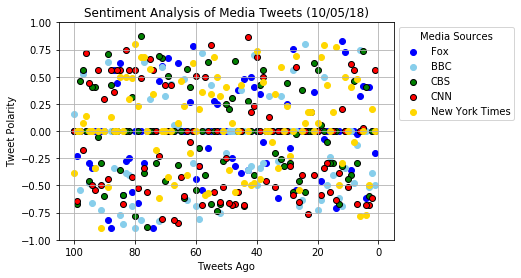

In [4]:
#scatter plot
#First filter the data by each username by doing a loc and create 5 differnet dataframes
foxnews_tweets = all_previous_100_tweets_df.loc[all_previous_100_tweets_df["username"] == "@foxnews", :]

bbc_tweets = all_previous_100_tweets_df.loc[all_previous_100_tweets_df["username"] == "@BBCWorld", :]

cbs_tweets = all_previous_100_tweets_df.loc[all_previous_100_tweets_df["username"] == "@CBSNews", :]

cnn_tweets = all_previous_100_tweets_df.loc[all_previous_100_tweets_df["username"] == "@cnnbrk", :]

nytimes_tweets = all_previous_100_tweets_df.loc[all_previous_100_tweets_df["username"] == "@nytimes", :]


#Obtain the x and y coordinates for each of the 5 usernames and using their resepective dataframes
x_fox_tweetsago = foxnews_tweets["Tweets Ago"]
y_fox_compound = foxnews_tweets["Compound"]

x_bbc_tweetsago = bbc_tweets["Tweets Ago"]
y_bbc_compound = bbc_tweets["Compound"]

x_cbs_tweetsago = cbs_tweets["Tweets Ago"]
y_cbs_compound = cbs_tweets["Compound"]

x_cnn_tweetsago = cnn_tweets["Tweets Ago"]
y_cnn_compound = cnn_tweets["Compound"]

x_nytimes_tweetsago = nytimes_tweets["Tweets Ago"]
y_nytimes_compound = nytimes_tweets["Compound"]



# Build the scatter plots for each user and their compound score
plt.scatter(x_fox_tweetsago, y_fox_compound, marker="o", facecolors="blue", label="Fox")

plt.scatter(x_bbc_tweetsago, y_bbc_compound, marker="o", facecolors="skyblue", label="BBC")

plt.scatter(x_cbs_tweetsago, y_cbs_compound, marker="o", facecolors="green", edgecolors="black", label="CBS")

plt.scatter(x_cnn_tweetsago, y_cnn_compound, marker="o", facecolors="red", edgecolors="black", label="CNN")

plt.scatter(x_nytimes_tweetsago, y_nytimes_compound, marker="o", facecolors="gold", label="New York Times")


#other graph properties
#y limit
plt.ylim(-1, 1)
#x limit
plt.xlim(105, -5)
#add a grid
plt.grid()
# add a title
plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
# add x label
plt.xlabel("Tweets Ago")
# add y label
plt.ylabel("Tweet Polarity")


# Create a legend
plt.legend(title="Media Sources", bbox_to_anchor = (1,1))


#Save Figure
plt.savefig("Sentiment_Analysis_of_Media_Tweets.png")


#Show figure
plt.show()

In [5]:
#put averages into a dataframe to use later for bar graphs
results_sent_avg_df = pd.DataFrame(results_list_sent_averages).set_index("Username").round(3)
results_sent_avg_df



,Compound Score,Negative Score,Neutral Score,Postive Score
Username,,,,
@foxnews,-0.007,0.074,0.857,0.069
@BBCWorld,-0.120,0.138,0.801,0.061
@CBSNews,-0.035,0.091,0.839,0.070
@cnnbrk,-0.098,0.101,0.833,0.065
@nytimes,0.055,0.061,0.861,0.078


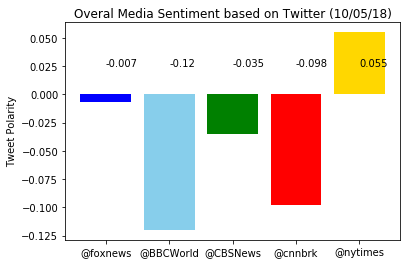

In [6]:
#Bar Chart
fox_compound = results_sent_avg_df.loc["@foxnews", "Compound Score"]
bbc_compound = results_sent_avg_df.loc["@BBCWorld", "Compound Score"]
cbs_compound = results_sent_avg_df.loc["@CBSNews", "Compound Score"]
cnn_compound = results_sent_avg_df.loc["@cnnbrk", "Compound Score"]
nytimes_compound = results_sent_avg_df.loc["@nytimes", "Compound Score"]


#create y axis
y_axis = results_sent_avg_df["Compound Score"]

#create x axis
x_axis = np.arange(len(results_sent_avg_df))
xlabels = results_sent_avg_df.index

#create bar chart
plt.bar(x_axis, y_axis, tick_label = xlabels, color = ['blue', 'skyblue', 'green', 'red', 'gold'])

#other graph properties
plt.title("Overal Media Sentiment based on Twitter (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.text(0, 0.025, f"{fox_compound}")
plt.text(1, 0.025, f"{bbc_compound}")
plt.text(2, 0.025, f"{cbs_compound}")
plt.text(3, 0.025, f"{cnn_compound}")
plt.text(4, 0.025, f"{nytimes_compound}")

#save figure
plt.savefig("Overall_Media_Sentiment_based_on_Twitter.png")

#show figure
plt.show()
